In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../../')
import utils.lec4_graphs as gfx
import utils.classmodelsdiag as cmd
plt.style.use('ggplot')

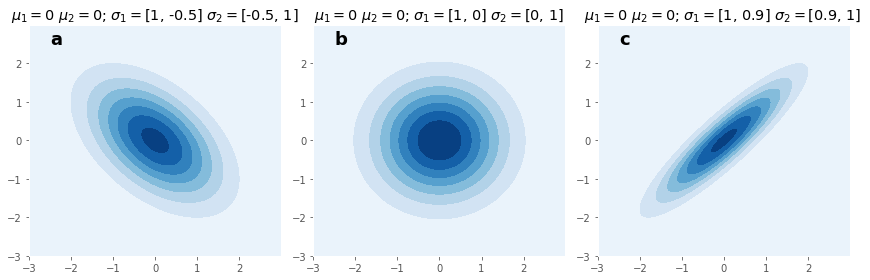

In [2]:
plt.figure(figsize=(12, 4))
gfx.plot_mvn()
plt.tight_layout()

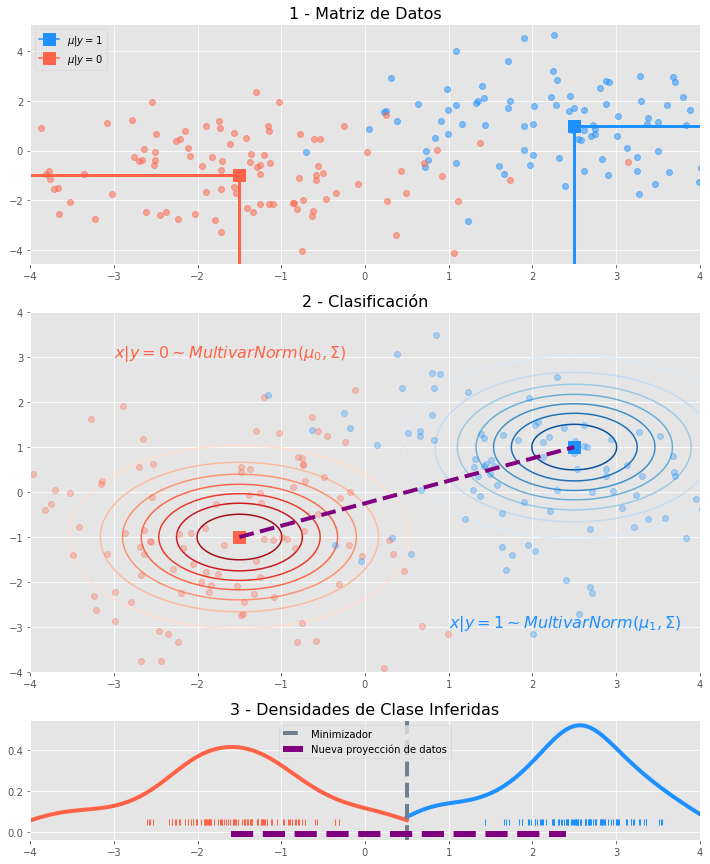

In [3]:
plt.figure(figsize=(12, 15))
gfx.plot_lda_sequence()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# botamos la columna de index
df = pd.read_csv('../../data/un2_iris.csv').drop(columns='Unnamed: 0')
# guardamos las etiquetas de cada clase para posterior uso.
target_label = df['Species'].unique()
print(df.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


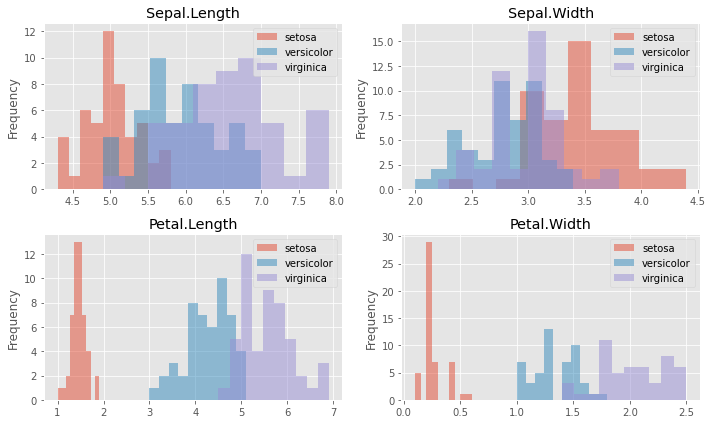

In [5]:
plt.figure(figsize=(10, 6))
for n, i in enumerate(df.drop(columns = 'Species').columns):
    plt.subplot(2, 2, n + 1)
    df.groupby('Species')[i].plot(kind='hist', alpha=.5)
    plt.legend(df['Species'].unique())
    plt.title(i)
    plt.tight_layout()

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df['Species'] = LabelEncoder().fit_transform(df['Species'])

In [7]:
X_train_mat, X_test_mat, y_train_vec, y_test_vec = train_test_split(df.loc[:, 'Sepal.Length':'Petal.Width'], df['Species'], test_size=.33, random_state=11238)

In [23]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_mat, y_train_vec)

LinearDiscriminantAnalysis()

In [37]:
lda_model = LinearDiscriminantAnalysis(n_components=None, priors=None,
            shrinkage=None,solver='svd', store_covariance=False, tol=0.0001)

lda_model.fit(X_train_mat, y_train_vec)

LinearDiscriminantAnalysis()

In [38]:
print("Probabilidades a priori\n", lda_model.priors_, "\n")
print("Medias de atributos en cada clase\n",
lda_model.means_.round(2), "\n")
print("Varianza explicada por cada discriminante\n",
lda_model.explained_variance_ratio_.round(2), "\n")

Probabilidades a priori
 [0.32 0.35 0.33] 

Medias de atributos en cada clase
 [[5.08 3.54 1.47 0.27]
 [5.96 2.8  4.32 1.35]
 [6.57 2.96 5.52 2.05]] 

Varianza explicada por cada discriminante
 [0.99 0.01] 



In [11]:
lda_model.coef_

array([[  6.00531776,  11.58512358, -14.96625342, -21.90925818],
       [ -1.832109  ,  -3.70832024,   4.79020568,   1.82865095],
       [ -3.88019252,  -7.30099231,   9.43220941,  19.30586298]])

In [12]:
lda_class_pred = lda_model.predict(X_test_mat)
lda_class_pred[:20]

array([2, 1, 0, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0])

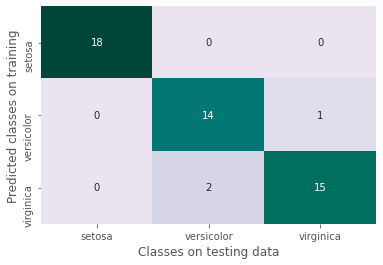

In [13]:
gfx.plot_confusion_matrix(y_test_vec, lda_class_pred, classes_labels=target_label)

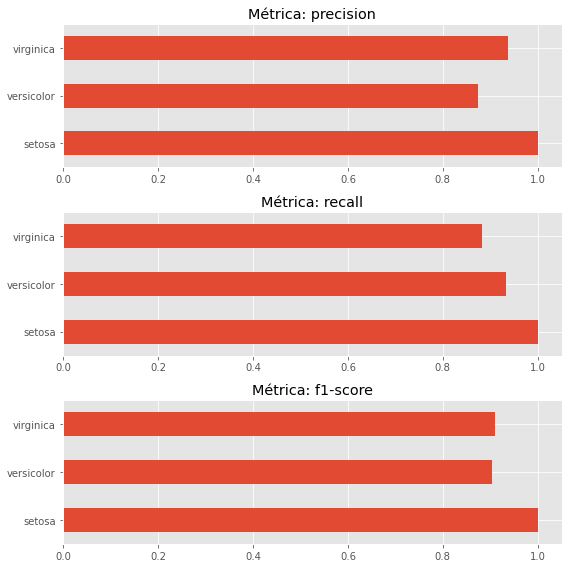

In [14]:
plt.figure(figsize=(8, 8))
gfx.plot_class_report(y_test_vec, lda_class_pred, classes_labels=target_label)

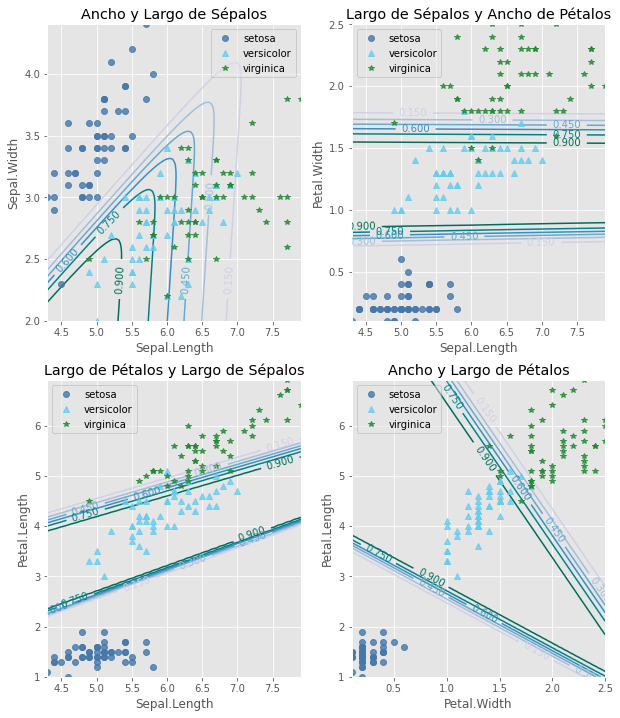

In [19]:
x_mat = df.loc[:, 'Sepal.Length':'Petal.Width']
y_vec = df['Species']

plt.figure(figsize=(10, 12))

plt.subplot(2, 2, 1)
gfx.probability_contours(LinearDiscriminantAnalysis(),x_mat,y_vec,'Sepal.Length', 'Sepal.Width',classes_labels=target_label)
plt.title('Ancho y Largo de Sépalos');

plt.subplot(2, 2, 2)
gfx.probability_contours(LinearDiscriminantAnalysis(),x_mat,y_vec,'Sepal.Length', 'Petal.Width',classes_labels=target_label)
plt.title('Largo de Sépalos y Ancho de Pétalos');

plt.subplot(2, 2, 3)
gfx.probability_contours(LinearDiscriminantAnalysis(),x_mat,y_vec,'Sepal.Length', 'Petal.Length',classes_labels=target_label)
plt.title('Largo de Pétalos y Largo de Sépalos');

plt.subplot(2, 2, 4)
gfx.probability_contours(LinearDiscriminantAnalysis(),x_mat,y_vec,'Petal.Width', 'Petal.Length',classes_labels=target_label)
plt.title('Ancho y Largo de Pétalos');

In [20]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_model = QuadraticDiscriminantAnalysis().fit(X_train_mat, y_train_vec)
qda_class_pred = qda_model.predict(X_test_mat)

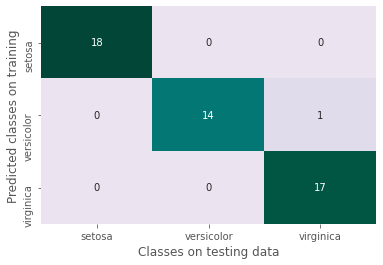

In [21]:
gfx.plot_confusion_matrix(y_test_vec, qda_class_pred,
classes_labels=target_label)

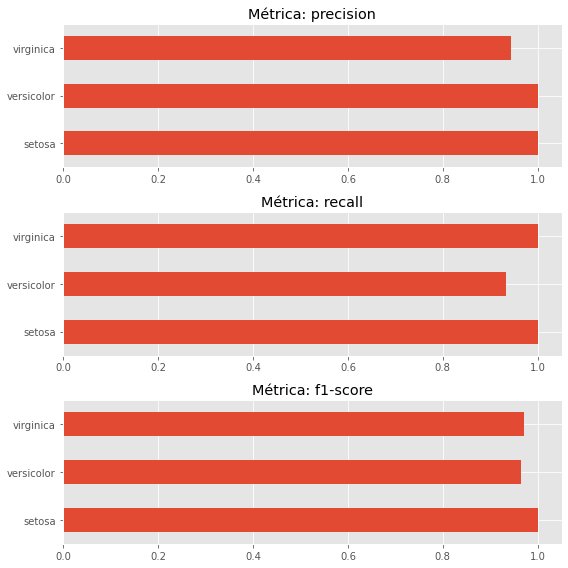

In [22]:
plt.figure(figsize=(8, 8))
gfx.plot_class_report(y_test_vec,qda_class_pred,
classes_labels=target_label)

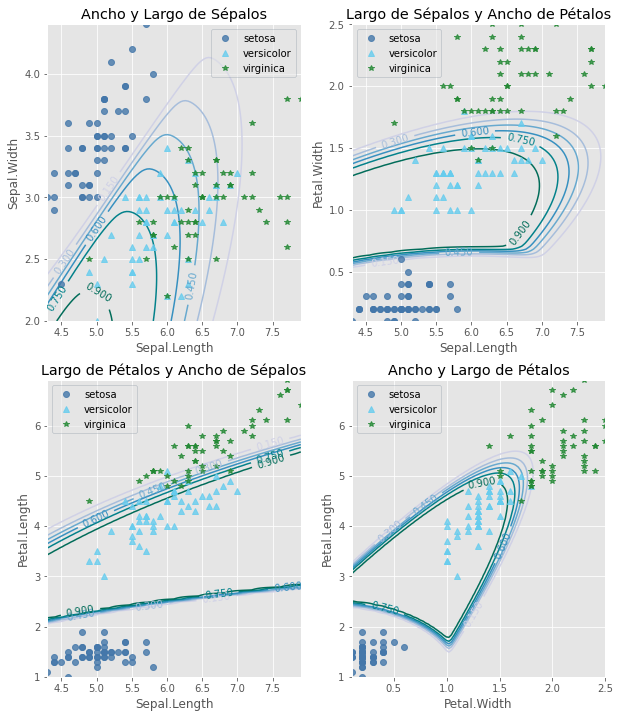

In [25]:
x_mat = df.loc[:, 'Sepal.Length':'Petal.Width']
y_vec = df['Species']
plt.figure(figsize=(10, 12))

plt.subplot(2, 2, 1)
gfx.probability_contours(QuadraticDiscriminantAnalysis(),x_mat,y_vec, 'Sepal.Length', 'Sepal.Width', classes_labels=target_label)
plt.title('Ancho y Largo de Sépalos');

plt.subplot(2, 2, 2)
gfx.probability_contours(QuadraticDiscriminantAnalysis(),x_mat,y_vec, 'Sepal.Length', 'Petal.Width', classes_labels=target_label)
plt.title('Largo de Sépalos y Ancho de Pétalos');

plt.subplot(2, 2, 3)
gfx.probability_contours(QuadraticDiscriminantAnalysis(),x_mat,y_vec, 'Sepal.Length', 'Petal.Length', classes_labels=target_label)
plt.title('Largo de Pétalos y Ancho de Sépalos');

plt.subplot(2, 2, 4)
gfx.probability_contours(QuadraticDiscriminantAnalysis(),x_mat,y_vec, 'Petal.Width', 'Petal.Length', classes_labels=target_label)
plt.title('Ancho y Largo de Pétalos');